In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'Haha')

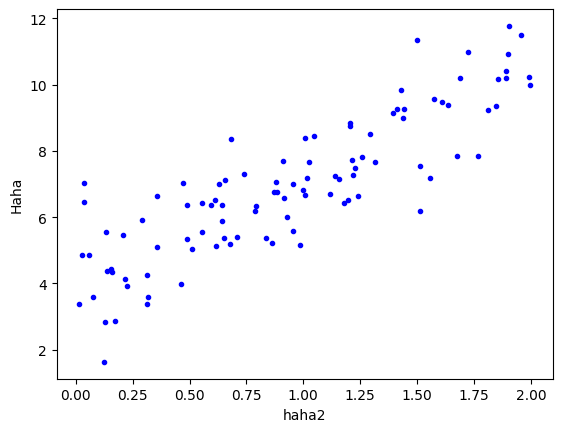

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("haha2")
plt.ylabel("Haha")

In [4]:
X_b = np.c_[np.ones((100,1)), X] # just to increase the nuumber of features for demo purposes ig
thetha_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) ## you can also use pinv... why??


In [5]:
thetha_best ## LEARN SVD and EigenValues and MOORE Penrose Inverse later on

array([[3.90515383],
       [3.23452221]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1 )), X_new]

y_predict = np.dot(X_new_b, thetha_best)

In [7]:
y_predict

array([[ 3.90515383],
       [10.37419824]])

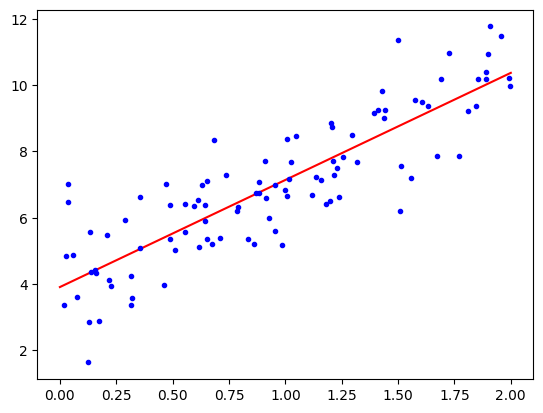

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel = "X"
plt.ylabel = "Y"

plt.show()

In [9]:
## using scikit learn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
lin_reg.intercept_

array([3.90515383])

In [11]:
lin_reg.coef_

array([[3.23452221]])

 Now we will look at very different ways to train a Linear Regression model, better
 suited for cases where there are a large number of features, or too many training
 instances to fit in memory.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of
 the ground below your feet. A good strategy to get to the bottom of the valley quickly
 is to go downhill in the direction of the steepest slope. This is exactly what Gradient
 Descent does

## Gradient Descent

### important

 When using Gradient Descent, you should ensure that all features
 have a similar scale (e.g., using Scikit-Learn’s StandardScaler
 class), or else it will take much longer to converge.

In [12]:


# np.random.rand gives only between 0 and 1
# np.random.randint gives only integers
# np.random.randn gives maybe float values with no restriction??
thetha = np.random.randn(2,1) # random intialisation

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1000000 # also called, epochs
m = 100 # number of data points (X)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(thetha) - y)

    thetha = thetha - eta * gradients

To find a good learning rate, you can use Grid Search

## Stochiastic (Random) Gradient Descent

Therefore randomness is good to escape from local optima, but bad because it means
 that the algorithm can never settle at the minimum. One solution to this dilemma is
 to gradually reduce the learning rate. The steps start out large (which helps make
 quick progress and escape local minima), then get smaller and smaller, allowing the
 algorithm to settle at the global minimum. This process is called simulated annealing,
 because it resembles the process of annealing in metallurgy where molten metal is
 slowly cooled down. The function that determines the learning rate at each iteration
 is called the learning schedule. If the learning rate is reduced too quickly, you may get
 stuck in a local minimum, or even end up frozen halfway to the minimum. If the
 learning rate is reduced too slowly, you may jump around the minimum for a long
 time and end up with a suboptimal solution if you halt training too early.

# implementing SGD

In [14]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/ (t+t1)


In [20]:
thetha = np.random.rand(2,1) # random initialisation
# m is number of data points
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(thetha) - yi)
        eta = learning_schedule(epoch * m + i )
        print(eta)
        thetha = thetha - eta * gradients
    

0.1
0.09803921568627451
0.09615384615384616
0.09433962264150944
0.09259259259259259
0.09090909090909091
0.08928571428571429
0.08771929824561403
0.08620689655172414
0.0847457627118644
0.08333333333333333
0.08196721311475409
0.08064516129032258
0.07936507936507936
0.078125
0.07692307692307693
0.07575757575757576
0.07462686567164178
0.07352941176470588
0.07246376811594203
0.07142857142857142
0.07042253521126761
0.06944444444444445
0.0684931506849315
0.06756756756756757
0.06666666666666667
0.06578947368421052
0.06493506493506493
0.0641025641025641
0.06329113924050633
0.0625
0.06172839506172839
0.06097560975609756
0.060240963855421686
0.05952380952380952
0.058823529411764705
0.05813953488372093
0.05747126436781609
0.056818181818181816
0.056179775280898875
0.05555555555555555
0.054945054945054944
0.05434782608695652
0.053763440860215055
0.05319148936170213
0.05263157894736842
0.052083333333333336
0.05154639175257732
0.05102040816326531
0.050505050505050504
0.05
0.04950495049504951
0.04901960

In [21]:
thetha

array([[3.96985525],
       [3.20388078]])

In [26]:
# Attempting SGD using  Scikit learn

from sklearn.linear_model import SGDRegressor

sgd_reg= SGDRegressor(penalty=None, eta0=0.1)

sgd_reg.fit(X, y.ravel()) # automatically sets for bias



,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [28]:
sgd_reg.intercept_

array([3.87960127])

In [29]:
sgd_reg.coef_

array([3.30295259])